<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/autokeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autokeras

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.datasets import mnist
import autokeras as ak

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

clf.fit(x_train, y_train, epochs=1)

Trial 1 Complete [00h 03m 03s]
val_loss: 0.06911668181419373

Best val_loss So Far: 0.06911668181419373
Total elapsed time: 00h 03m 03s
1875/1875 [==============================] - 186s 99ms/step - loss: 0.1606 - accuracy: 0.9514


In [ ]:
model = clf.export_model()

try:
    model.save("model_autokeras", save_format="tf")
except Exception:
    model.save("model_autokeras.h5")


print('Model saved')

1/1 [==============================] - 0s 184ms/step


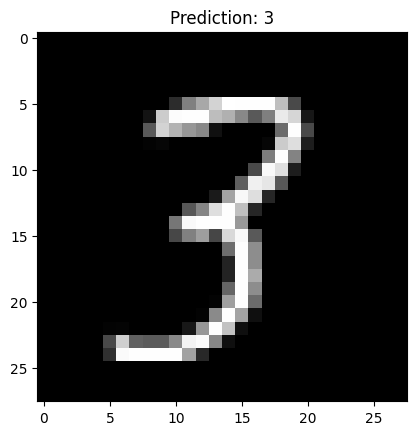

In [25]:
model = load_model('model_autokeras')

random_index = np.random.randint(0, len(x_test))
image = x_test[random_index]

prediction = model.predict(image)
plt.title(f'Prediction: {np.argmax(prediction)}')
plt.imshow(image, cmap='gray')
plt.show()